<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/homework-1/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import matplotlib.pyplot as plt
import numpy as np
#from google.colab import drive
#drive.mount('/content/drive')

w0, w1, w2 = 1, 0, 1
best_w0, best_w1, best_w2 = w0, w1, w2

temp0,temp1,temp2 = 1,0,1

x1, x2, y = [], [], []
x11,x22,y22 = [],[],[]

In [174]:
def file_read(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1.append(float(values[0]))
            x2.append(float(values[1]))
            y.append(float(values[2]))
    return x1,x2,y

In [175]:
def misclassified_points():
    return [(x1[i], x2[i], y[i]) for i in range(len(x1)) if (w0 + w1 * x1[i] + w2 * x2[i]) * y[i] <= 0]

def PLA(n):

    global w0, w1, w2
    for i in range(1000):
        misclassified = misclassified_points()
        if not misclassified:
            break
        x1_misclassified, x2_misclassified, y_misclassified = misclassified[0]
        signal = w0+ w1*x1_misclassified+ w2*x2_misclassified
        if y_misclassified*signal <= 1 and signal is not None:
          w0 += n*(y_misclassified - signal)
          w1 += n*(y_misclassified - signal) * x1_misclassified
          w2 += n*(y_misclassified - signal) * x2_misclassified
          print(w0,w1,w2)

-1.9931063603748846 26.39113626188407 -1.9724729637668195
-82.51149696047385 -196.73500167838415 340.0460251779425
-717.9595988361231 4194.3775591699605 1540.7509021512142
-5079.466586690289 -7891.882518142068 20067.15286452003
-16618.27544954113 71844.3042535792 41870.19867611748
-21237.88340342862 59042.815377970786 61492.93781206529
34570.58698762951 -445267.60835726507 514335.6944073086
-2105058.5292802807 14340129.12234135 4557251.405751476
-20380355.53705979 -36302915.41278092 82185350.88848929
-95570097.21659514 483277862.56326264 224259407.39522445
-386632881.7901664 -323292096.6226999 1460608714.7132764
-4301105320.850666 34191811309.08994 -2426878762.0298944
-105058287590.90001 -245018450869.59976 425560068072.8263
-889028618397.1785 5172421552137.198 1906903700736.087
-6233434388841.602 -9637569187338.438 24608371296451.293
-20099611041168.36 86181337642741.66 50809072631899.98
-22996812323438.92 78152844671996.3 63115533603006.3
194090286223272.44 -1883543756012586.5 182461

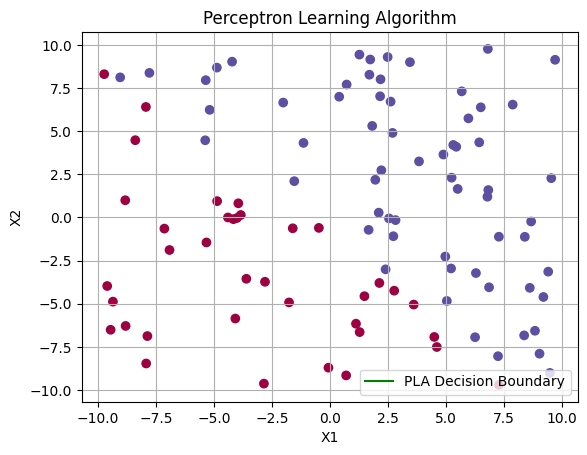

In [176]:
file_read('synthetic_dataset.csv')
PLA(1)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from PLA -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
plt.show()


Weights obtained from PLA --> w0:  nan    w1: nan    w2:  nan


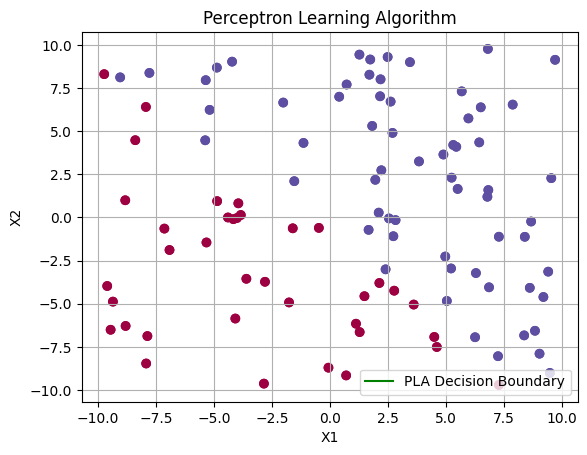

In [177]:
file_read('synthetic_dataset.csv')
PLA(0.1)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from PLA -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
plt.show()

Weights obtained from PLA --> w0:  nan    w1: nan    w2:  nan


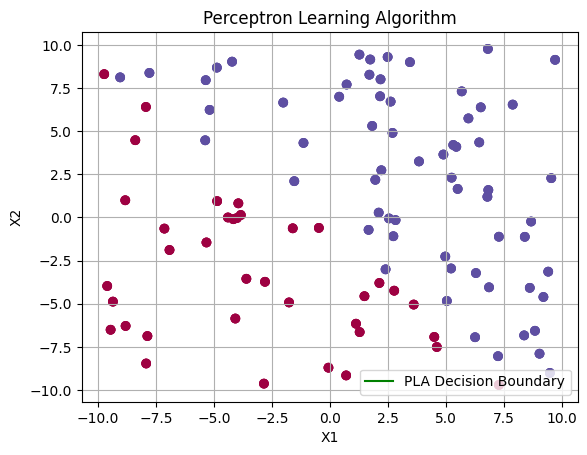

In [178]:
file_read('synthetic_dataset.csv')
PLA(0.0001)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from PLA -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
plt.show()